# Import libraries

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib. rcParams['figure.figsize'] = (12,8)

# Import dataset movies

In [67]:
df = pd.read_csv(r'D:\Ricky Leonardo Silaban\Become Data Analyst\4. Python\Portfolio\movies.csv')

In [68]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


* Kita perlu melihat apakah ada data yang hilang

In [69]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


* kita dapat melihat bahwa ada data yang hilang dan mari kita perbaiki

In [70]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

# Data Cleaning

* isi sel kosong pada kolom (votes, budget, gross, rating)

In [71]:
x = df["votes"].mean()
w = df["gross"].mean()
f = df["runtime"].mean()
z = np.random.choice(["R", "PG", "NC-17", "PG-13", "Not Rated"])

df["votes"].fillna(x, inplace = True)
df["gross"].fillna(w, inplace = True)
df["rating"].fillna(z, inplace = True)
df["runtime"].fillna(f, inplace = True)

* Isi sel kosong di "Anggaran" dengan data acak dari nilai yang ada

In [72]:
existing_budgets = df.dropna(subset=["budget"])["budget"]
df["budget"] = df["budget"].apply(lambda x: np.random.choice(existing_budgets) if pd.isnull(x) else x)

* Hapus sel yang tidak bisa diisi

In [73]:
df = df.dropna()

* Memeriksa baris duplikat

In [74]:
df.duplicated().sum()

0

* Hapus data duplikat dalam kerangka data

In [75]:
df = df.drop_duplicates()

* Kita dapat melihat bahwa data yang hilang telah diperbaiki

In [76]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

* Ubah tipe data untuk kolom (votes, budget, gross, rating)

In [77]:
df["votes"] = df["votes"].astype('int64')

df["budget"] = df["budget"].astype('int64')

df["gross"] = df["gross"].astype('int64')

df["runtime"] = df["runtime"].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7645 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7645 non-null   object 
 1   rating    7645 non-null   object 
 2   genre     7645 non-null   object 
 3   year      7645 non-null   int64  
 4   released  7645 non-null   object 
 5   score     7645 non-null   float64
 6   votes     7645 non-null   int64  
 7   director  7645 non-null   object 
 8   writer    7645 non-null   object 
 9   star      7645 non-null   object 
 10  country   7645 non-null   object 
 11  budget    7645 non-null   int64  
 12  gross     7645 non-null   int64  
 13  company   7645 non-null   object 
 14  runtime   7645 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 955.6+ KB


In [78]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [79]:
pd.set_option('display.max_rows', None)

# Correlation

* Scatter plot Budget Vs Gross dengan matplotlib

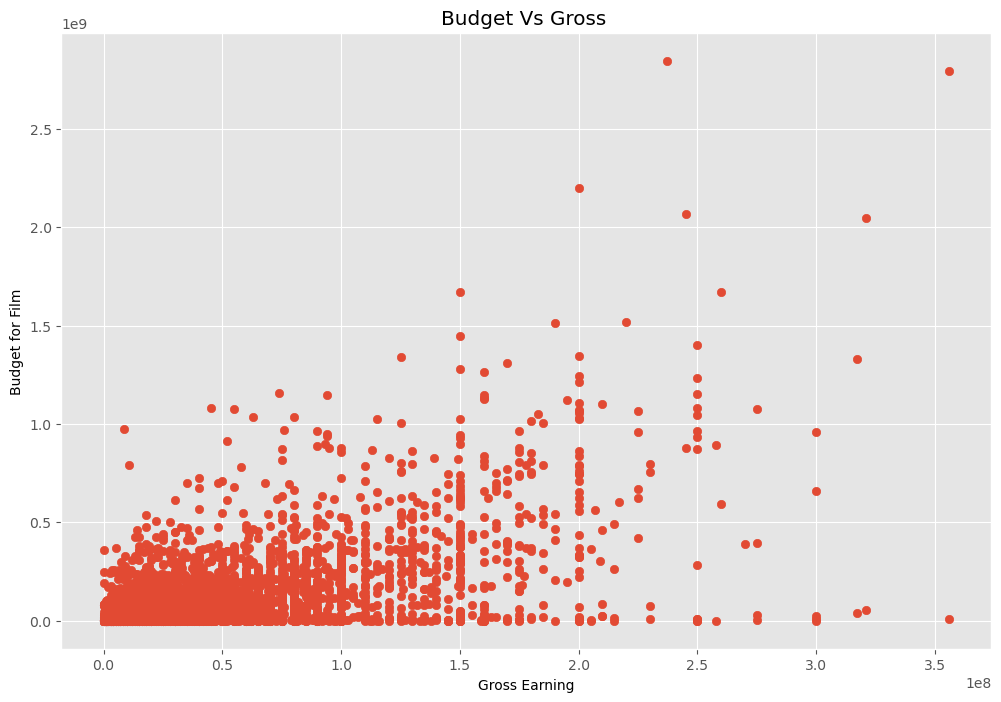

<Figure size 1000x800 with 0 Axes>

In [81]:
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget Vs Gross ')
plt.xlabel('Gross Earning')
plt.ylabel('Budget for Film')
plt.figure(figsize=(10, 8))

plt.show()

In [82]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103


* Scatter plot Budget Vs Gross dengan seaborn

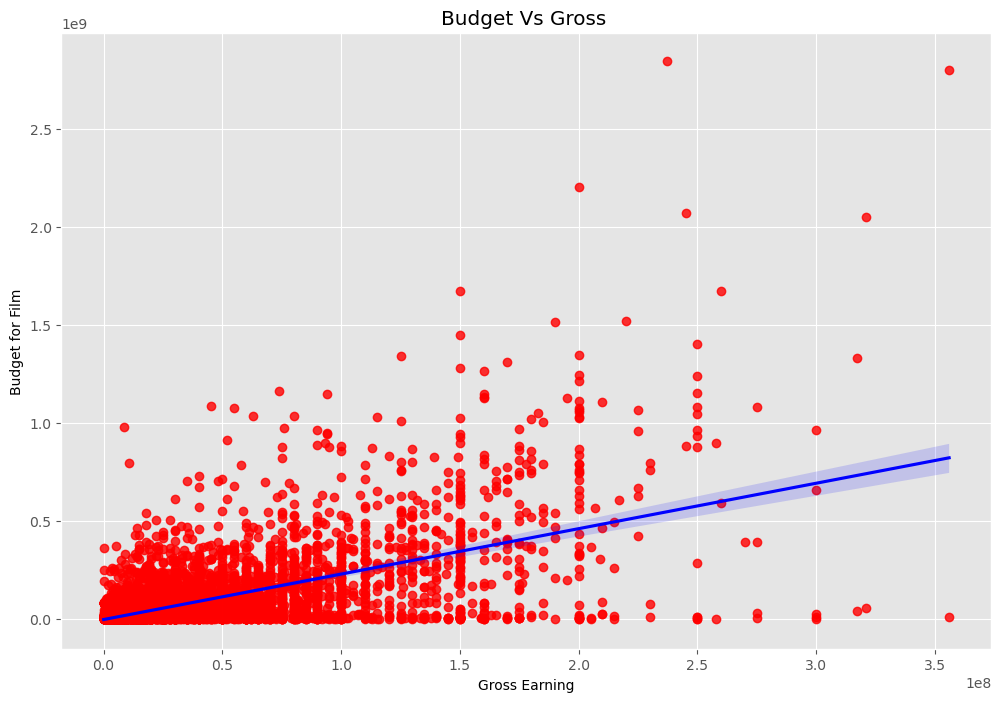

<Figure size 1000x800 with 0 Axes>

In [83]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title('Budget Vs Gross ')
plt.xlabel('Gross Earning')
plt.ylabel('Budget for Film')
plt.figure(figsize=(10, 8))

plt.show()

* Mari kita mulai melihat korelasinya

In [84]:
# Method pearson, kendall, spearman
df.corr(method='pearson')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2060\3008658957.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.097922,0.223123,0.231159,0.252334,0.119750
score,0.097922,1.000000,0.409468,0.052422,0.182881,0.399922
votes,0.223123,0.409468,1.000000,0.351730,0.628735,0.308901
budget,0.231159,0.052422,0.351730,1.000000,0.594308,0.219696
gross,0.252334,0.182881,0.628735,0.594308,1.000000,0.241296
runtime,0.119750,0.399922,0.308901,0.219696,0.241296,1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2060\4174929259.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


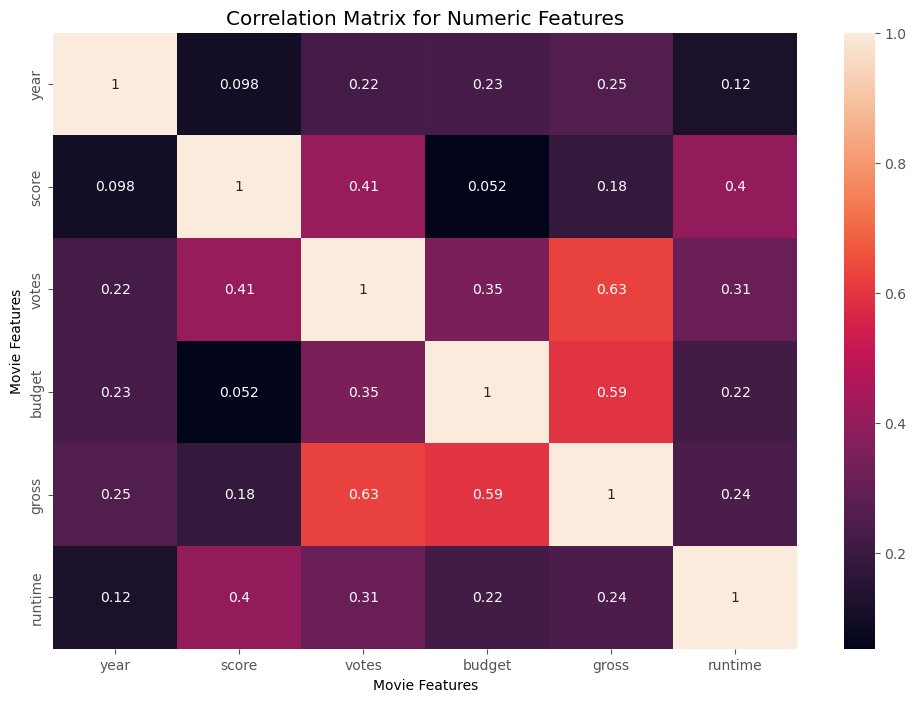

<Figure size 1000x800 with 0 Axes>

In [85]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.figure(figsize=(10, 8))

plt.show()

* Correlation all columns

In [86]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103


In [94]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,532,5,0,2009,694,7.8,1100000,1153,1774,2325,55,237000000,2847246203,2247,162
7445,534,5,0,2019,181,8.4,903000,162,739,2232,55,356000000,2797501328,1600,181
3045,6875,5,6,1997,702,7.8,1100000,1153,1774,1587,55,200000000,2201647264,2247,194
6663,5130,5,0,2015,696,7.8,876000,1123,2541,520,55,245000000,2069521700,1534,138
7244,535,5,0,2018,190,8.4,897000,162,739,2232,55,321000000,2048359754,1600,149
7480,6176,4,2,2019,1485,6.9,222000,1451,1914,671,55,260000000,1670727580,2310,118
6653,2964,5,0,2015,1701,7.0,593000,517,3555,435,55,150000000,1670516444,2275,124
6043,5486,5,0,2012,2468,8.0,1300000,1512,2306,2232,55,220000000,1518815515,1600,143
6646,2142,5,0,2015,219,7.1,370000,1186,702,2711,55,190000000,1515341399,2275,137
7494,2128,4,2,2019,2671,6.8,148000,432,1945,1519,55,150000000,1450026933,2309,103


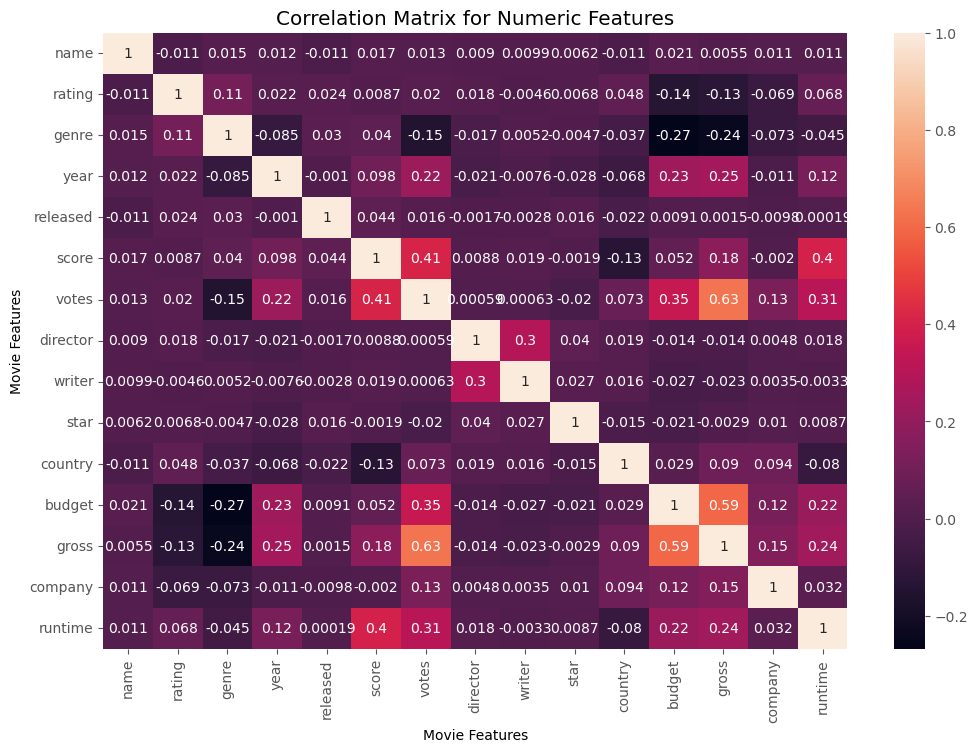

<Figure size 1000x800 with 0 Axes>

In [88]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.figure(figsize=(10, 8))

plt.show()

In [89]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.010988,0.015257,0.012053,-0.010561,0.016539,0.013207,0.009009,0.009875,0.006182,-0.011004,0.021272,0.005515,0.010510,0.010672
rating,-0.010988,1.000000,0.109832,0.022335,0.024027,0.008664,0.019958,0.018386,-0.004592,0.006769,0.047528,-0.135252,-0.126233,-0.069480,0.068452
genre,0.015257,0.109832,1.000000,-0.084628,0.029983,0.039896,-0.150184,-0.016558,0.005208,-0.004739,-0.036937,-0.267302,-0.237852,-0.072830,-0.045078
year,0.012053,0.022335,-0.084628,1.000000,-0.000997,0.097922,0.223123,-0.021203,-0.007553,-0.028199,-0.068255,0.231159,0.252334,-0.010749,0.119750
released,-0.010561,0.024027,0.029983,-0.000997,1.000000,0.043924,0.016468,-0.001667,-0.002822,0.016498,-0.022249,0.009133,0.001525,-0.009842,0.000185
score,0.016539,0.008664,0.039896,0.097922,0.043924,1.000000,0.409468,0.008810,0.018796,-0.001873,-0.133202,0.052422,0.182881,-0.002007,0.399922
votes,0.013207,0.019958,-0.150184,0.223123,0.016468,0.409468,1.000000,0.000586,0.000626,-0.019871,0.073397,0.351730,0.628735,0.131675,0.308901
director,0.009009,0.018386,-0.016558,-0.021203,-0.001667,0.008810,0.000586,1.000000,0.299378,0.039875,0.019445,-0.013583,-0.014380,0.004815,0.017987
writer,0.009875,-0.004592,0.005208,-0.007553,-0.002822,0.018796,0.000626,0.299378,1.000000,0.027109,0.015814,-0.027137,-0.023247,0.003550,-0.003254
star,0.006182,0.006769,-0.004739,-0.028199,0.016498,-0.001873,-0.019871,0.039875,0.027109,1.000000,-0.014527,-0.021404,-0.002928,0.010164,0.008734


In [90]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.010988
          genre       0.015257
          year        0.012053
          released   -0.010561
          score       0.016539
          votes       0.013207
          director    0.009009
          writer      0.009875
          star        0.006182
          country    -0.011004
          budget      0.021272
          gross       0.005515
          company     0.010510
          runtime     0.010672
rating    name       -0.010988
          rating      1.000000
          genre       0.109832
          year        0.022335
          released    0.024027
          score       0.008664
          votes       0.019958
          director    0.018386
          writer     -0.004592
          star        0.006769
          country     0.047528
          budget     -0.135252
          gross      -0.126233
          company    -0.069480
          runtime     0.068452
genre     name        0.015257
          rating      0.109832
        

In [91]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre     budget     -0.267302
budget    genre      -0.267302
genre     gross      -0.237852
gross     genre      -0.237852
genre     votes      -0.150184
votes     genre      -0.150184
budget    rating     -0.135252
rating    budget     -0.135252
score     country    -0.133202
country   score      -0.133202
gross     rating     -0.126233
rating    gross      -0.126233
year      genre      -0.084628
genre     year       -0.084628
runtime   country    -0.080025
country   runtime    -0.080025
company   genre      -0.072830
genre     company    -0.072830
company   rating     -0.069480
rating    company    -0.069480
country   year       -0.068255
year      country    -0.068255
runtime   genre      -0.045078
genre     runtime    -0.045078
          country    -0.036937
country   genre      -0.036937
year      star       -0.028199
star      year       -0.028199
writer    budget     -0.027137
budget    writer     -0.027137
writer    gross      -0.023247
gross     writer     -0.023247
country 

In [92]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     budget      0.594308
budget    gross       0.594308
gross     votes       0.628735
votes     gross       0.628735
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64